# Les nombres dans sympy

In [1]:
%matplotlib widget
from sympy import *
init_printing(use_latex=True)

In [2]:
a = 2
b = 1/3
c = S(1) / 3


x, y, z = symbols("x, y, z")

expr1 = (x + 1)**2
res = expr1.subs(x, c)


type(a), type(b), type(c)

(int, float, sympy.core.numbers.Rational)

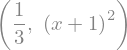

In [3]:
c,expr1

In [4]:
res

In [1]:
from manim import *



Manim Community v0.15.1

In [2]:
%%manim -qm -v WARNING Mon


class Mon(Scene):
    def construct(self):
        text=MathTex("\\frac{d}{dx}f(x)g(x)=","f(x)\\frac{d}{dx}g(x)","+","g(x)\\frac{d}{dx}f(x)")
        self.play(Write(text))
        framebox1 = SurroundingRectangle(text[1], buff = .1)
        framebox2 = SurroundingRectangle(text[3], buff = .1)
        self.play(Create(framebox1),)
        self.wait()
        self.play(ReplacementTransform(framebox1,framebox2),)
        self.wait()

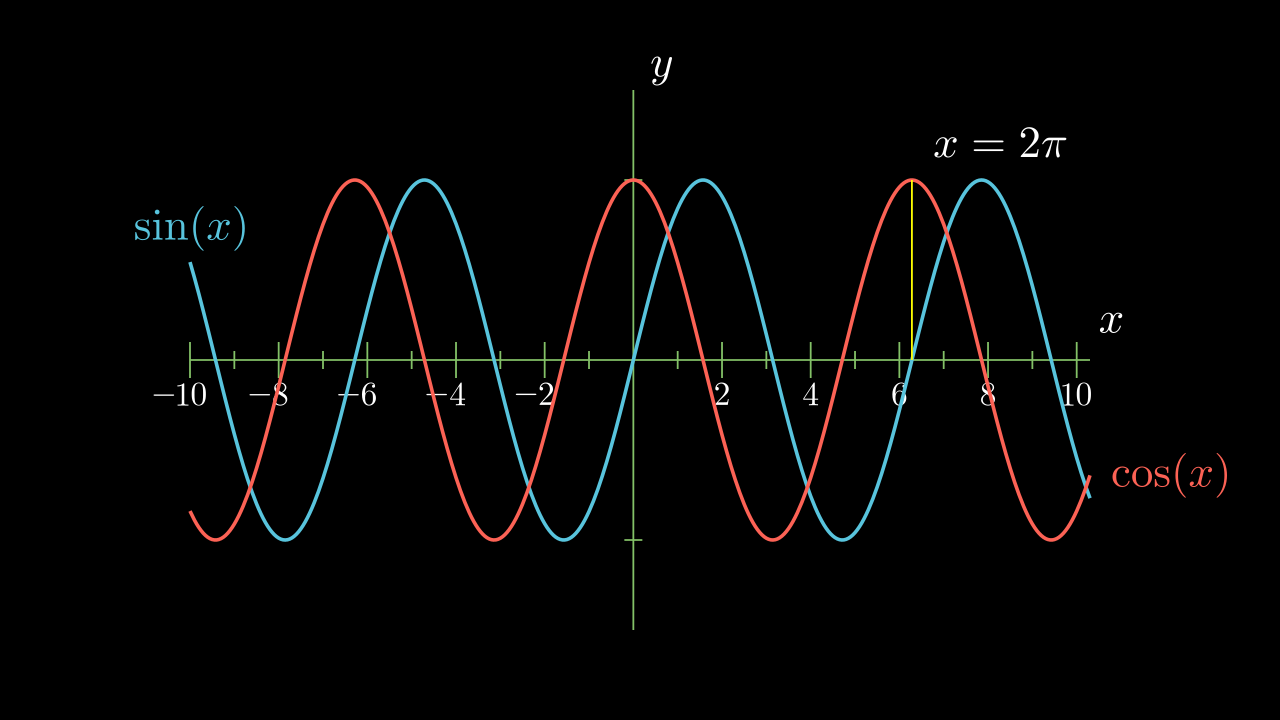

In [3]:
%%manim -qm -v WARNING Mon
class Mon(Scene):
    def construct(self):
        axes = Axes(
            x_range=[-10, 10.3, 1],
            y_range=[-1.5, 1.5, 1],
            x_length=10,
            axis_config={"color": GREEN},
            x_axis_config={
                "numbers_to_include": np.arange(-10, 10.01, 2),
                "numbers_with_elongated_ticks": np.arange(-10, 10.01, 2),
            },
            tips=False,
        )
        axes_labels = axes.get_axis_labels()
        sin_graph = axes.plot(lambda x: np.sin(x), color=BLUE)
        cos_graph = axes.plot(lambda x: np.cos(x), color=RED)

        sin_label = axes.get_graph_label(
            sin_graph, "\\sin(x)", x_val=-10, direction=UP / 2
        )
        cos_label = axes.get_graph_label(cos_graph, label="\\cos(x)")

        vert_line = axes.get_vertical_line(
            axes.i2gp(TAU, cos_graph), color=YELLOW, line_func=Line
        )
        line_label = axes.get_graph_label(
            cos_graph, "x=2\pi", x_val=TAU, direction=UR, color=WHITE
        )

        plot = VGroup(axes, sin_graph, cos_graph, vert_line)
        labels = VGroup(axes_labels, sin_label, cos_label, line_label)
        self.add(plot, labels)

In [26]:
%%manim -qh -v WARNING Mon
class Mon(Scene):
    def construct(self):
        ax = Axes(x_range=[0, 10], y_range=[0, 100, 10], axis_config={"include_tip": False})
        labels = ax.get_axis_labels(x_label="x", y_label="f(x)")

        t = ValueTracker(0)
        d = ValueTracker(2)

        def func(x):
            return 2 * (x - 5) ** 2
        graph = ax.plot(func, color=MAROON)

        initial_point = [ax.coords_to_point(t.get_value(), func(t.get_value()))]
        dot = Dot(point=initial_point)

        dot.add_updater(lambda x: x.move_to(ax.c2p(t.get_value(), func(t.get_value()))))
        x_space = np.linspace(*ax.x_range[:2],200)
        minimum_index = func(x_space).argmin()
        
        slopea = always_redraw(lambda: ax.get_secant_slope_group(x=d.get_value(),graph=graph,dx=1.0,dx_label=Tex("dx = 1.0"),dy_label="dy",secant_line_length=4))

        t_label = ax.get_T_label(x_val=2, graph=graph, label=Tex("x-value"))

        self.add(ax, labels, graph, dot,slopea,t_label)
        self.play(t.animate.set_value(x_space[minimum_index]),d.animate.set_value(6))
        self.wait()

In [ ]:
    def get_secant_slope_group(
        self,
        x: float,
        graph: ParametricFunction,
        dx: float | None = None,
        dx_line_color: Color = YELLOW,
        dy_line_color: Color | None = None,
        dx_label: float | str | None = None,
        dy_label: float | str | None = None,
        include_secant_line: bool = True,
        secant_line_color: Color = GREEN,
        secant_line_length: float = 10,
    ) -> VGroup:
        """Creates two lines representing `dx` and `df`, the labels for `dx` and `df`, and
         the secant to the curve at a particular x-value.

        Parameters
        ----------
        x
            The x-value at which the secant intersects the graph for the first time.
        graph
            The curve for which the secant will be found.
        dx
            The change in `x` after which the secant exits.
        dx_line_color
            The color of the line that indicates the change in `x`.
        dy_line_color
            The color of the line that indicates the change in `y`. Defaults to the color of :attr:`graph`.
        dx_label
            The label for the `dx` line. Defaults to :class:`~.MathTex` for ``str`` and ``float`` inputs.
        dy_label
            The label for the `dy` line. Defaults to :class:`~.MathTex` for ``str`` and ``float`` inputs.
        include_secant_line
            Whether to include the secant line in the graph,
            or just the df/dx lines and labels.
        secant_line_color
            The color of the secant line.
        secant_line_length
            The length of the secant line.

        Returns
        -------
        :class:`~.VGroup`
            A group containing the elements: `dx_line`, `df_line`, and
            if applicable also :attr:`dx_label`, :attr:`df_label`, `secant_line`.

        Examples
        --------
         .. manim:: GetSecantSlopeGroupExample
            :save_last_frame:

            class GetSecantSlopeGroupExample(Scene):
                def construct(self):
                    ax = Axes(y_range=[-1, 7])
                    graph = ax.plot(lambda x: 1 / 4 * x ** 2, color=BLUE)
                    slopes = ax.get_secant_slope_group(
                        x=2.0,
                        graph=graph,
                        dx=1.0,
                        dx_label=Tex("dx = 1.0"),
                        dy_label="dy",
                        dx_line_color=GREEN_B,
                        secant_line_length=4,
                        secant_line_color=RED_D,
                    )

                    self.add(ax, graph, slopes)
        """
        group = VGroup()

        dx = dx or float(self.x_range[1] - self.x_range[0]) / 10
        dy_line_color = dy_line_color or graph.get_color()

        p1 = self.input_to_graph_point(x, graph)
        p2 = self.input_to_graph_point(x + dx, graph)
        interim_point = p2[0] * RIGHT + p1[1] * UP

        group.dx_line = Line(p1, interim_point, color=dx_line_color)
        group.df_line = Line(interim_point, p2, color=dy_line_color)
        group.add(group.dx_line, group.df_line)

        labels = VGroup()
        if dx_label is not None:
            group.dx_label = self.x_axis._create_label_tex(dx_label)
            labels.add(group.dx_label)
            group.add(group.dx_label)
        if dy_label is not None:
            group.df_label = self.x_axis._create_label_tex(dy_label)
            labels.add(group.df_label)
            group.add(group.df_label)

        if len(labels) > 0:
            max_width = 0.8 * group.dx_line.width
            max_height = 0.8 * group.df_line.height
            if labels.width > max_width:
                labels.width = max_width
            if labels.height > max_height:
                labels.height = max_height

        if dx_label is not None:
            group.dx_label.next_to(
                group.dx_line,
                np.sign(dx) * DOWN,
                buff=group.dx_label.height / 2,
            )
            group.dx_label.set_color(group.dx_line.get_color())

        if dy_label is not None:
            group.df_label.next_to(
                group.df_line,
                np.sign(dx) * RIGHT,
                buff=group.df_label.height / 2,
            )
            group.df_label.set_color(group.df_line.get_color())

        if include_secant_line:
            group.secant_line = Line(p1, p2, color=secant_line_color)
            group.secant_line.scale(
                secant_line_length / group.secant_line.get_length(),
            )
            group.add(group.secant_line)
        return group